In [181]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [182]:
url = 'Dataset/'

In [183]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/Dataset A.zip'

In [184]:
PATH = 'Dataset/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [185]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

In [186]:
TRAIN_PATH = url + 'training-c'


In [187]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [188]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


# **Base Parameters**

In [195]:
batch_size = 460
num_iters = 20000
input_dim = 28*28
num_hidden = 330
output_dim = 10

learning_rate = 0.28

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

378


In [196]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:43
Test dataloader:11


In [197]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ELU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ELU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ELU()
#         self.softmax_4 = nn.Softmax(dim=1)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ELU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ELU()
        
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.ELU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        out  = self.linear_7(out)
        out = self.relu_7(out)
        
        probas  = self.linear_out(out)
        return probas

In [198]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=330, bias=True)
  (relu_1): ELU(alpha=1.0)
  (linear_2): Linear(in_features=330, out_features=330, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=330, out_features=330, bias=True)
  (relu_3): ELU(alpha=1.0)
  (linear_4): Linear(in_features=330, out_features=330, bias=True)
  (relu_4): ELU(alpha=1.0)
  (linear_5): Linear(in_features=330, out_features=330, bias=True)
  (relu_5): ELU(alpha=1.0)
  (linear_6): Linear(in_features=330, out_features=330, bias=True)
  (relu_6): ELU(alpha=1.0)
  (linear_7): Linear(in_features=330, out_features=330, bias=True)
  (relu_7): ELU(alpha=1.0)
  (linear_out): Linear(in_features=330, out_features=10, bias=True)
)

In [199]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [200]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.3031530380249023. Accuracy: 9.857995472319407
Iteration: 20. Loss: 2.3043460845947266. Accuracy: 9.775674006997324
Iteration: 30. Loss: 2.3038766384124756. Accuracy: 9.590450710022639
Iteration: 40. Loss: 2.2653415203094482. Accuracy: 15.311792549907388
Epoch:  2
Iteration: 50. Loss: 2.228445291519165. Accuracy: 15.167729985593743
Iteration: 60. Loss: 2.123638868331909. Accuracy: 17.555052479934144
Iteration: 70. Loss: 2.173280954360962. Accuracy: 17.431570281951018
Iteration: 80. Loss: 2.112790822982788. Accuracy: 18.501749331138093
Epoch:  3
Iteration: 90. Loss: 2.1765248775482178. Accuracy: 16.56719489606915
Iteration: 100. Loss: 2.1119139194488525. Accuracy: 18.58407079646018
Iteration: 110. Loss: 2.104520082473755. Accuracy: 17.575632846264664
Iteration: 120. Loss: 2.0569252967834473. Accuracy: 19.551348013994648
Epoch:  4
Iteration: 130. Loss: 2.1079978942871094. Accuracy: 17.781436509569872
Iteration: 140. Loss: 2.02129864692688. Accuracy: 24.675

Iteration: 1150. Loss: 0.6562007665634155. Accuracy: 72.09302325581395
Iteration: 1160. Loss: 0.6141814589500427. Accuracy: 71.8460588598477
Epoch:  28
Iteration: 1170. Loss: 0.773618221282959. Accuracy: 69.21177196954106
Iteration: 1180. Loss: 0.6287664771080017. Accuracy: 70.03498662276189
Iteration: 1190. Loss: 0.5285555124282837. Accuracy: 70.87878164231323
Iteration: 1200. Loss: 0.64312744140625. Accuracy: 70.3436921177197
Epoch:  29
Iteration: 1210. Loss: 0.5432794690132141. Accuracy: 71.04342457295739
Iteration: 1220. Loss: 0.5284004807472229. Accuracy: 72.40172875077177
Iteration: 1230. Loss: 0.4896419942378998. Accuracy: 72.31940728544969
Iteration: 1240. Loss: 0.48154690861701965. Accuracy: 73.67771146326405
Epoch:  30
Iteration: 1250. Loss: 0.6465417742729187. Accuracy: 72.44288948343281
Iteration: 1260. Loss: 0.46484458446502686. Accuracy: 71.66083556287302
Iteration: 1270. Loss: 0.5173174142837524. Accuracy: 72.99855937435686
Iteration: 1280. Loss: 0.5416873097419739. Accu

Iteration: 2270. Loss: 0.2229611873626709. Accuracy: 79.95472319407286
Epoch:  54
Iteration: 2280. Loss: 0.16594736278057098. Accuracy: 80.03704465939494
Iteration: 2290. Loss: 0.21415136754512787. Accuracy: 80.01646429306442
Iteration: 2300. Loss: 0.17093145847320557. Accuracy: 80.32516978802222
Iteration: 2310. Loss: 0.2426336407661438. Accuracy: 78.96686561020786
Iteration: 2320. Loss: 0.20441584289073944. Accuracy: 78.76106194690266
Epoch:  55
Iteration: 2330. Loss: 0.21555553376674652. Accuracy: 79.37847293681827
Iteration: 2340. Loss: 0.14210999011993408. Accuracy: 78.86396377855526
Iteration: 2350. Loss: 0.15308713912963867. Accuracy: 80.7985182136242
Iteration: 2360. Loss: 0.23297330737113953. Accuracy: 80.07820539205598
Epoch:  56
Iteration: 2370. Loss: 0.25076228380203247. Accuracy: 78.94628524387734
Iteration: 2380. Loss: 0.14125113189220428. Accuracy: 79.39905330314879
Iteration: 2390. Loss: 0.194580078125. Accuracy: 79.58427660012349
Iteration: 2400. Loss: 0.20696097612380

Iteration: 3460. Loss: 0.17518965899944305. Accuracy: 80.46923235233587
Iteration: 3470. Loss: 0.0703493058681488. Accuracy: 80.42807161967482
Iteration: 3480. Loss: 0.14141543209552765. Accuracy: 80.2016875900391
Epoch:  82
Iteration: 3490. Loss: 0.16564230620861053. Accuracy: 79.74891953076765
Iteration: 3500. Loss: 0.08166506886482239. Accuracy: 80.44865198600534
Iteration: 3510. Loss: 0.0664437860250473. Accuracy: 80.77793784729369
Iteration: 3520. Loss: 0.19341717660427094. Accuracy: 80.7985182136242
Epoch:  83
Iteration: 3530. Loss: 0.06092234328389168. Accuracy: 79.95472319407286
Iteration: 3540. Loss: 0.08138827979564667. Accuracy: 79.66659806544557
Iteration: 3550. Loss: 0.0977540835738182. Accuracy: 81.08664334225149
Iteration: 3560. Loss: 0.056659795343875885. Accuracy: 81.3953488372093
Epoch:  84
Iteration: 3570. Loss: 0.04483826085925102. Accuracy: 80.44865198600534
Iteration: 3580. Loss: 0.11965283006429672. Accuracy: 79.41963366947931
Iteration: 3590. Loss: 0.09873320907

Iteration: 4570. Loss: 0.08849899470806122. Accuracy: 79.91356246141181
Iteration: 4580. Loss: 0.06273341178894043. Accuracy: 80.67503601564108
Iteration: 4590. Loss: 0.05072811245918274. Accuracy: 81.31302737188722
Iteration: 4600. Loss: 0.12162528187036514. Accuracy: 80.94258077793785
Epoch:  108
Iteration: 4610. Loss: 0.07441921532154083. Accuracy: 80.44865198600534
Iteration: 4620. Loss: 0.07330082356929779. Accuracy: 81.06606297592097
Iteration: 4630. Loss: 0.057243380695581436. Accuracy: 80.63387528298004
Iteration: 4640. Loss: 0.04069254919886589. Accuracy: 81.35418810454826
Epoch:  109
Iteration: 4650. Loss: 0.08844846487045288. Accuracy: 80.42807161967482
Iteration: 4660. Loss: 0.13955143094062805. Accuracy: 80.36633052068326
Iteration: 4670. Loss: 0.05640894174575806. Accuracy: 80.53097345132744
Iteration: 4680. Loss: 0.07122880220413208. Accuracy: 81.41592920353982
Epoch:  110
Iteration: 4690. Loss: 0.09973937273025513. Accuracy: 79.68717843177609
Iteration: 4700. Loss: 0.13

Iteration: 5670. Loss: 0.05140196159482002. Accuracy: 80.86025931261577
Epoch:  133
Iteration: 5680. Loss: 0.11906826496124268. Accuracy: 80.46923235233587
Iteration: 5690. Loss: 0.06690113991498947. Accuracy: 80.2016875900391
Iteration: 5700. Loss: 0.0508376844227314. Accuracy: 80.6956163819716
Iteration: 5710. Loss: 0.037089332938194275. Accuracy: 81.10722370858201
Epoch:  134
Iteration: 5720. Loss: 0.019375991076231003. Accuracy: 80.86025931261577
Iteration: 5730. Loss: 0.06955717504024506. Accuracy: 81.00432187692941
Iteration: 5740. Loss: 0.028639018535614014. Accuracy: 81.3953488372093
Iteration: 5750. Loss: 0.021603718400001526. Accuracy: 80.83967894628525
Iteration: 5760. Loss: 0.035396866500377655. Accuracy: 81.08664334225149
Epoch:  135
Iteration: 5770. Loss: 0.030011147260665894. Accuracy: 81.90985799547232
Iteration: 5780. Loss: 0.025143973529338837. Accuracy: 80.96316114426837
Iteration: 5790. Loss: 0.01964988373219967. Accuracy: 81.37476847087878
Iteration: 5800. Loss: 0.

Iteration: 6770. Loss: 0.02487354353070259. Accuracy: 79.2138300061741
Iteration: 6780. Loss: 0.036082830280065536. Accuracy: 80.48981271866639
Iteration: 6790. Loss: 0.01980743557214737. Accuracy: 81.08664334225149
Epoch:  159
Iteration: 6800. Loss: 0.017506349831819534. Accuracy: 80.01646429306442
Iteration: 6810. Loss: 0.022159148007631302. Accuracy: 80.55155381765796
Iteration: 6820. Loss: 0.0515725277364254. Accuracy: 80.5103930849969
Iteration: 6830. Loss: 0.03143877908587456. Accuracy: 80.77793784729369
Epoch:  160
Iteration: 6840. Loss: 0.028200190514326096. Accuracy: 81.14838444124305
Iteration: 6850. Loss: 0.04195889085531235. Accuracy: 80.73677711463264
Iteration: 6860. Loss: 0.016426296904683113. Accuracy: 80.48981271866639
Iteration: 6870. Loss: 0.020067239180207253. Accuracy: 81.10722370858201
Iteration: 6880. Loss: 0.3008769154548645. Accuracy: 80.3045894216917
Epoch:  161
Iteration: 6890. Loss: 0.05073004215955734. Accuracy: 80.16052685737806
Iteration: 6900. Loss: 0.03

Epoch:  184
Iteration: 7870. Loss: 0.014192447066307068. Accuracy: 80.48981271866639
Iteration: 7880. Loss: 0.046362683176994324. Accuracy: 80.63387528298004
Iteration: 7890. Loss: 0.045600999146699905. Accuracy: 80.44865198600534
Iteration: 7900. Loss: 0.011471040546894073. Accuracy: 80.98374151059889
Iteration: 7910. Loss: 0.06257516145706177. Accuracy: 81.55999176785346
Epoch:  185
Iteration: 7920. Loss: 0.03131682053208351. Accuracy: 81.35418810454826
Iteration: 7930. Loss: 0.03263212367892265. Accuracy: 80.65445564931056
Iteration: 7940. Loss: 0.02064715512096882. Accuracy: 81.2924470055567
Iteration: 7950. Loss: 0.034522879868745804. Accuracy: 82.095081292447
Epoch:  186
Iteration: 7960. Loss: 0.05511404573917389. Accuracy: 81.31302737188722
Iteration: 7970. Loss: 0.03211225941777229. Accuracy: 81.14838444124305
Iteration: 7980. Loss: 0.01671433262526989. Accuracy: 81.55999176785346
Iteration: 7990. Loss: 0.025743523612618446. Accuracy: 81.97159909446388
Epoch:  187
Iteration: 80

Iteration: 8960. Loss: 0.05069632828235626. Accuracy: 79.70775879810661
Iteration: 8970. Loss: 0.012198084034025669. Accuracy: 80.44865198600534
Iteration: 8980. Loss: 0.015600097365677357. Accuracy: 80.63387528298004
Epoch:  210
Iteration: 8990. Loss: 0.010481791570782661. Accuracy: 80.32516978802222
Iteration: 9000. Loss: 0.024804847314953804. Accuracy: 80.26342868903066
Iteration: 9010. Loss: 0.014634172432124615. Accuracy: 81.10722370858201
Iteration: 9020. Loss: 0.01937040314078331. Accuracy: 81.00432187692941
Iteration: 9030. Loss: 0.08263186365365982. Accuracy: 80.61329491664952
Epoch:  211
Iteration: 9040. Loss: 0.011696475557982922. Accuracy: 80.38691088701378
Iteration: 9050. Loss: 0.030648190528154373. Accuracy: 80.63387528298004
Iteration: 9060. Loss: 0.02495841309428215. Accuracy: 81.16896480757357
Iteration: 9070. Loss: 0.01833888702094555. Accuracy: 81.16896480757357
Epoch:  212
Iteration: 9080. Loss: 0.07565813511610031. Accuracy: 80.77793784729369
Iteration: 9090. Loss

Iteration: 10050. Loss: 0.00842352770268917. Accuracy: 81.4982506688619
Iteration: 10060. Loss: 0.011947720311582088. Accuracy: 81.35418810454826
Epoch:  235
Iteration: 10070. Loss: 0.01633962243795395. Accuracy: 79.48137476847089
Iteration: 10080. Loss: 0.009049850516021252. Accuracy: 81.02490224325993
Iteration: 10090. Loss: 0.03149827942252159. Accuracy: 81.47767030253138
Iteration: 10100. Loss: 0.03285852074623108. Accuracy: 81.08664334225149
Epoch:  236
Iteration: 10110. Loss: 0.05790668725967407. Accuracy: 79.60485696645401
Iteration: 10120. Loss: 0.048421796411275864. Accuracy: 80.3045894216917
Iteration: 10130. Loss: 0.030110225081443787. Accuracy: 80.11936612471702
Iteration: 10140. Loss: 0.11031288653612137. Accuracy: 79.1109281745215
Epoch:  237
Iteration: 10150. Loss: 0.028645731508731842. Accuracy: 80.71619674830212
Iteration: 10160. Loss: 0.05911105126142502. Accuracy: 80.88083967894629
Iteration: 10170. Loss: 0.015119070187211037. Accuracy: 80.34575015435274
Iteration: 1

Iteration: 11130. Loss: 0.026589766144752502. Accuracy: 80.3045894216917
Epoch:  260
Iteration: 11140. Loss: 0.04492296651005745. Accuracy: 80.94258077793785
Iteration: 11150. Loss: 0.05087239295244217. Accuracy: 80.34575015435274
Iteration: 11160. Loss: 0.02332797646522522. Accuracy: 81.53941140152294
Iteration: 11170. Loss: 0.042077112942934036. Accuracy: 81.7863757974892
Iteration: 11180. Loss: 0.12028271704912186. Accuracy: 81.1895451739041
Epoch:  261
Iteration: 11190. Loss: 0.009259544312953949. Accuracy: 81.60115250051452
Iteration: 11200. Loss: 0.0042384616099298. Accuracy: 81.51883103519242
Iteration: 11210. Loss: 0.009639431722462177. Accuracy: 81.90985799547232
Iteration: 11220. Loss: 0.009757774882018566. Accuracy: 80.98374151059889
Epoch:  262
Iteration: 11230. Loss: 0.021247057244181633. Accuracy: 80.7985182136242
Iteration: 11240. Loss: 0.009625044651329517. Accuracy: 81.76579543115868
Iteration: 11250. Loss: 0.0024635044392198324. Accuracy: 81.31302737188722
Iteration: 

Iteration: 12210. Loss: 0.0221036896109581. Accuracy: 81.2924470055567
Epoch:  285
Iteration: 12220. Loss: 0.02587372064590454. Accuracy: 81.02490224325993
Iteration: 12230. Loss: 0.010600627399981022. Accuracy: 80.92200041160733
Iteration: 12240. Loss: 0.007050420623272657. Accuracy: 81.72463469849764
Iteration: 12250. Loss: 0.021669035777449608. Accuracy: 81.41592920353982
Epoch:  286
Iteration: 12260. Loss: 0.016473349183797836. Accuracy: 80.5103930849969
Iteration: 12270. Loss: 0.022215135395526886. Accuracy: 80.96316114426837
Iteration: 12280. Loss: 0.02251226268708706. Accuracy: 81.2924470055567
Iteration: 12290. Loss: 0.009274072013795376. Accuracy: 81.72463469849764
Epoch:  287
Iteration: 12300. Loss: 0.008855316787958145. Accuracy: 80.98374151059889
Iteration: 12310. Loss: 0.06329125165939331. Accuracy: 80.4074912533443
Iteration: 12320. Loss: 0.025738324970006943. Accuracy: 81.08664334225149
Iteration: 12330. Loss: 0.009158936329185963. Accuracy: 81.04548260959045
Iteration: 

Epoch:  310
Iteration: 13290. Loss: 0.004672978539019823. Accuracy: 81.86869726281128
Iteration: 13300. Loss: 0.012569576501846313. Accuracy: 81.2924470055567
Iteration: 13310. Loss: 0.003933393862098455. Accuracy: 81.3953488372093
Iteration: 13320. Loss: 0.0016499963821843266. Accuracy: 81.82753653015024
Iteration: 13330. Loss: 0.0031410581432282925. Accuracy: 81.16896480757357
Epoch:  311
Iteration: 13340. Loss: 0.01183423399925232. Accuracy: 81.35418810454826
Iteration: 13350. Loss: 0.0076391249895095825. Accuracy: 81.10722370858201
Iteration: 13360. Loss: 0.0020520701073110104. Accuracy: 80.98374151059889
Iteration: 13370. Loss: 0.0022168599534779787. Accuracy: 81.93043836180284
Epoch:  312
Iteration: 13380. Loss: 0.020630531013011932. Accuracy: 80.592714550319
Iteration: 13390. Loss: 0.02520417794585228. Accuracy: 80.73677711463264
Iteration: 13400. Loss: 0.004375095013529062. Accuracy: 81.3953488372093
Iteration: 13410. Loss: 0.005437429528683424. Accuracy: 80.98374151059889
Epoc

Epoch:  335
Iteration: 14370. Loss: 0.02350241132080555. Accuracy: 80.7985182136242
Iteration: 14380. Loss: 0.052769735455513. Accuracy: 81.8892776291418
Iteration: 14390. Loss: 0.03385021537542343. Accuracy: 81.7863757974892
Iteration: 14400. Loss: 0.02687130682170391. Accuracy: 81.00432187692941
Epoch:  336
Iteration: 14410. Loss: 0.01741744950413704. Accuracy: 80.53097345132744
Iteration: 14420. Loss: 0.007173025980591774. Accuracy: 80.67503601564108
Iteration: 14430. Loss: 0.022086437791585922. Accuracy: 80.90142004527681
Iteration: 14440. Loss: 0.024644246324896812. Accuracy: 80.67503601564108
Epoch:  337
Iteration: 14450. Loss: 0.011491500772535801. Accuracy: 81.27186663922618
Iteration: 14460. Loss: 0.0046195522882044315. Accuracy: 81.14838444124305
Iteration: 14470. Loss: 0.020205823704600334. Accuracy: 82.52726898538793
Iteration: 14480. Loss: 0.008583229035139084. Accuracy: 81.1895451739041
Iteration: 14490. Loss: 0.0037800425197929144. Accuracy: 81.16896480757357
Epoch:  338

Iteration: 15450. Loss: 0.009962371550500393. Accuracy: 80.75735748096317
Iteration: 15460. Loss: 0.035611703991889954. Accuracy: 81.2924470055567
Iteration: 15470. Loss: 0.008707315661013126. Accuracy: 81.47767030253138
Iteration: 15480. Loss: 0.03188258036971092. Accuracy: 81.45708993620086
Epoch:  361
Iteration: 15490. Loss: 0.0031279069371521473. Accuracy: 81.41592920353982
Iteration: 15500. Loss: 0.0018799323588609695. Accuracy: 81.82753653015024
Iteration: 15510. Loss: 0.00173149723559618. Accuracy: 81.64231323317556
Iteration: 15520. Loss: 0.0110431257635355. Accuracy: 81.62173286684504
Epoch:  362
Iteration: 15530. Loss: 0.01573556661605835. Accuracy: 79.95472319407286
Iteration: 15540. Loss: 0.011458724737167358. Accuracy: 81.16896480757357
Iteration: 15550. Loss: 0.03696876019239426. Accuracy: 80.75735748096317
Iteration: 15560. Loss: 0.01136005949229002. Accuracy: 81.02490224325993
Epoch:  363
Iteration: 15570. Loss: 0.027802767232060432. Accuracy: 80.55155381765796
Iteratio

In [201]:
torch.save(model.state_dict(), 'model_base_80+.pkl')

[2.3031530380249023, 2.3043460845947266, 2.3038766384124756, 2.2653415203094482, 2.228445291519165, 2.123638868331909, 2.173280954360962, 2.112790822982788, 2.1765248775482178, 2.1119139194488525, 2.104520082473755, 2.0569252967834473, 2.1079978942871094, 2.02129864692688, 1.901497483253479, 1.932432770729065, 1.8025413751602173, 1.9576255083084106, 1.910561203956604, 1.820465326309204, 1.8324670791625977, 1.9106459617614746, 1.811011791229248, 1.834259271621704, 1.7167420387268066, 1.8241839408874512, 1.733518362045288, 1.8398329019546509, 1.734735369682312, 1.6966779232025146, 1.7333734035491943, 1.566197395324707, 1.5406967401504517, 1.510119915008545, 1.5708332061767578, 1.5260155200958252, 1.419560432434082, 1.438417911529541, 1.4699018001556396, 1.3723416328430176, 1.45710289478302, 1.4486781358718872, 2.316460609436035, 1.434361219406128, 1.4207475185394287, 1.3601036071777344, 1.243581771850586, 1.269171118736267, 1.3113294839859009, 1.2036372423171997, 1.1084238290786743, 1.22

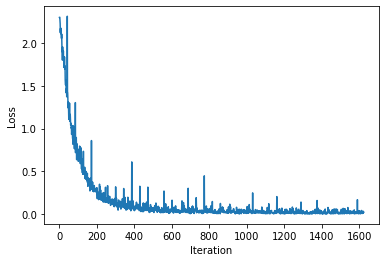

In [202]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

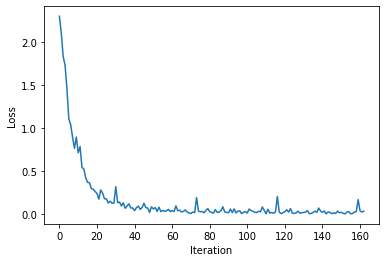

In [203]:

plt.plot(iteration_loss[0:-1:10])
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [204]:
print(accuracy)

81.7863757974892


In [210]:
batch_size = 250 # 300 te 83
num_iters = 15000
input_dim = 28*28
num_hidden = 330
output_dim = 10

learning_rate = 0.28

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

154


In [211]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:78
Test dataloader:20


In [212]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=330, bias=True)
  (relu_1): ELU(alpha=1.0)
  (linear_2): Linear(in_features=330, out_features=330, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=330, out_features=330, bias=True)
  (relu_3): ELU(alpha=1.0)
  (linear_4): Linear(in_features=330, out_features=330, bias=True)
  (relu_4): ELU(alpha=1.0)
  (linear_5): Linear(in_features=330, out_features=330, bias=True)
  (relu_5): ELU(alpha=1.0)
  (linear_6): Linear(in_features=330, out_features=330, bias=True)
  (relu_6): ELU(alpha=1.0)
  (linear_7): Linear(in_features=330, out_features=330, bias=True)
  (relu_7): ELU(alpha=1.0)
  (linear_out): Linear(in_features=330, out_features=10, bias=True)
)

In [213]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [214]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.312023639678955. Accuracy: 10.413665363243465
Iteration: 20. Loss: 2.3047196865081787. Accuracy: 9.960897303972011
Iteration: 30. Loss: 2.297774314880371. Accuracy: 11.874871372710434
Iteration: 40. Loss: 2.2150990962982178. Accuracy: 15.414694381559991
Iteration: 50. Loss: 2.1761434078216553. Accuracy: 16.27906976744186
Iteration: 60. Loss: 2.1670968532562256. Accuracy: 17.719695410578307
Iteration: 70. Loss: 2.2044131755828857. Accuracy: 18.97509775674007
Epoch:  2
Iteration: 80. Loss: 2.0955827236175537. Accuracy: 22.94710845853056
Iteration: 90. Loss: 2.1141440868377686. Accuracy: 24.223091171022844
Iteration: 100. Loss: 2.066253185272217. Accuracy: 26.137065239761267
Iteration: 110. Loss: 2.034071445465088. Accuracy: 26.81621732866845
Iteration: 120. Loss: 1.9356164932250977. Accuracy: 28.133360773821774
Iteration: 130. Loss: 1.9332070350646973. Accuracy: 30.109075941551758
Iteration: 140. Loss: 1.768379807472229. Accuracy: 31.446799753035602
Itera

Iteration: 1160. Loss: 0.6340683698654175. Accuracy: 75.48878370034987
Iteration: 1170. Loss: 0.597608745098114. Accuracy: 73.41016670096728
Epoch:  16
Iteration: 1180. Loss: 0.5560312271118164. Accuracy: 74.54208684914592
Iteration: 1190. Loss: 0.5934350490570068. Accuracy: 74.37744391850175
Iteration: 1200. Loss: 0.4773763418197632. Accuracy: 74.68614941345956
Iteration: 1210. Loss: 0.6555861234664917. Accuracy: 75.01543527474789
Iteration: 1220. Loss: 0.51692134141922. Accuracy: 75.7151677299856
Iteration: 1230. Loss: 0.5113083720207214. Accuracy: 75.09775674006997
Iteration: 1240. Loss: 0.5914056301116943. Accuracy: 73.71887219592509
Epoch:  17
Iteration: 1250. Loss: 0.4391714334487915. Accuracy: 75.94155175962132
Iteration: 1260. Loss: 0.6076355576515198. Accuracy: 75.48878370034987
Iteration: 1270. Loss: 0.5527290105819702. Accuracy: 75.63284626466351
Iteration: 1280. Loss: 0.532680094242096. Accuracy: 74.56266721547644
Iteration: 1290. Loss: 0.4323222041130066. Accuracy: 74.1922

Iteration: 2290. Loss: 0.3798162639141083. Accuracy: 79.83124099608973
Iteration: 2300. Loss: 0.30071789026260376. Accuracy: 80.2016875900391
Iteration: 2310. Loss: 0.2197769731283188. Accuracy: 79.56369623379297
Iteration: 2320. Loss: 0.3644135594367981. Accuracy: 79.70775879810661
Iteration: 2330. Loss: 0.24366606771945953. Accuracy: 79.48137476847089
Iteration: 2340. Loss: 0.3114723563194275. Accuracy: 79.23441037250463
Epoch:  31
Iteration: 2350. Loss: 0.16131819784641266. Accuracy: 79.70775879810661
Iteration: 2360. Loss: 0.34733477234840393. Accuracy: 79.56369623379297
Iteration: 2370. Loss: 0.2804253101348877. Accuracy: 80.6956163819716
Iteration: 2380. Loss: 0.2357075959444046. Accuracy: 80.55155381765796
Iteration: 2390. Loss: 0.3153219521045685. Accuracy: 80.03704465939494
Iteration: 2400. Loss: 0.3698221445083618. Accuracy: 79.19324963984359
Iteration: 2410. Loss: 0.315632700920105. Accuracy: 80.07820539205598
Epoch:  32
Iteration: 2420. Loss: 0.30775147676467896. Accuracy: 

Iteration: 3420. Loss: 0.17623703181743622. Accuracy: 80.48981271866639
Iteration: 3430. Loss: 0.1687319278717041. Accuracy: 80.98374151059889
Epoch:  45
Iteration: 3440. Loss: 0.10873907059431076. Accuracy: 81.4982506688619
Iteration: 3450. Loss: 0.09320056438446045. Accuracy: 81.6834739658366
Iteration: 3460. Loss: 0.1470012366771698. Accuracy: 81.55999176785346
Iteration: 3470. Loss: 0.3120656907558441. Accuracy: 81.12780407491253
Iteration: 3480. Loss: 0.15091350674629211. Accuracy: 80.88083967894629
Iteration: 3490. Loss: 0.12298097461462021. Accuracy: 81.580572134184
Iteration: 3500. Loss: 0.15412724018096924. Accuracy: 81.84811689648076
Iteration: 3510. Loss: 0.23917746543884277. Accuracy: 81.76579543115868
Epoch:  46
Iteration: 3520. Loss: 0.1965971738100052. Accuracy: 82.32146532208273
Iteration: 3530. Loss: 0.1666354537010193. Accuracy: 80.96316114426837
Iteration: 3540. Loss: 0.13744297623634338. Accuracy: 81.3953488372093
Iteration: 3550. Loss: 0.13663579523563385. Accuracy

Iteration: 4550. Loss: 0.09830954670906067. Accuracy: 81.6834739658366
Iteration: 4560. Loss: 0.09207633882761002. Accuracy: 81.580572134184
Iteration: 4570. Loss: 0.1187758818268776. Accuracy: 81.8892776291418
Iteration: 4580. Loss: 0.1305117905139923. Accuracy: 81.4982506688619
Iteration: 4590. Loss: 0.11663392186164856. Accuracy: 81.70405433216712
Iteration: 4600. Loss: 0.12178017944097519. Accuracy: 81.47767030253138
Epoch:  60
Iteration: 4610. Loss: 0.1473046988248825. Accuracy: 80.77793784729369
Iteration: 4620. Loss: 0.1666761189699173. Accuracy: 81.53941140152294
Iteration: 4630. Loss: 0.0709725171327591. Accuracy: 81.35418810454826
Iteration: 4640. Loss: 0.18563969433307648. Accuracy: 81.90985799547232
Iteration: 4650. Loss: 0.18310393393039703. Accuracy: 82.13624202510805
Iteration: 4660. Loss: 0.1138935536146164. Accuracy: 82.19798312409961
Iteration: 4670. Loss: 0.14927661418914795. Accuracy: 81.23070590656513
Iteration: 4680. Loss: 0.18198873102664948. Accuracy: 81.0043218

Iteration: 5680. Loss: 0.09963918477296829. Accuracy: 79.70775879810661
Iteration: 5690. Loss: 0.21551816165447235. Accuracy: 81.55999176785346
Epoch:  74
Iteration: 5700. Loss: 0.1117946058511734. Accuracy: 82.21856349043013
Iteration: 5710. Loss: 0.06062343344092369. Accuracy: 82.38320642107429
Iteration: 5720. Loss: 0.08818842470645905. Accuracy: 82.15682239143857
Iteration: 5730. Loss: 0.09911132603883743. Accuracy: 81.70405433216712
Iteration: 5740. Loss: 0.09732465445995331. Accuracy: 81.53941140152294
Iteration: 5750. Loss: 0.034239303320646286. Accuracy: 82.11566165877753
Iteration: 5760. Loss: 0.11800706386566162. Accuracy: 82.07450092611649
Iteration: 5770. Loss: 0.06380236148834229. Accuracy: 82.67133154970159
Epoch:  75
Iteration: 5780. Loss: 0.08493704348802567. Accuracy: 81.86869726281128
Iteration: 5790. Loss: 0.07742509245872498. Accuracy: 81.47767030253138
Iteration: 5800. Loss: 0.10795392096042633. Accuracy: 82.44494752006585
Iteration: 5810. Loss: 0.15320703387260437

Iteration: 6800. Loss: 0.06233074888586998. Accuracy: 81.21012554023461
Iteration: 6810. Loss: 0.03669911250472069. Accuracy: 82.03334019345544
Iteration: 6820. Loss: 0.023032907396554947. Accuracy: 82.05392055978596
Iteration: 6830. Loss: 0.030227061361074448. Accuracy: 82.44494752006585
Iteration: 6840. Loss: 0.07108064740896225. Accuracy: 81.70405433216712
Iteration: 6850. Loss: 0.07179660350084305. Accuracy: 82.11566165877753
Iteration: 6860. Loss: 0.04299427568912506. Accuracy: 81.04548260959045
Epoch:  89
Iteration: 6870. Loss: 0.07485952228307724. Accuracy: 81.80695616381972
Iteration: 6880. Loss: 0.022594915702939034. Accuracy: 81.25128627289565
Iteration: 6890. Loss: 0.06397286802530289. Accuracy: 81.74521506482816
Iteration: 6900. Loss: 0.0735735297203064. Accuracy: 82.52726898538793
Iteration: 6910. Loss: 0.10138502717018127. Accuracy: 81.72463469849764
Iteration: 6920. Loss: 0.09633594751358032. Accuracy: 81.60115250051452
Iteration: 6930. Loss: 0.04391784965991974. Accurac

Iteration: 7920. Loss: 0.01945946179330349. Accuracy: 82.67133154970159
Iteration: 7930. Loss: 0.04585489258170128. Accuracy: 81.45708993620086
Iteration: 7940. Loss: 0.09703444689512253. Accuracy: 82.19798312409961
Iteration: 7950. Loss: 0.0436520092189312. Accuracy: 81.82753653015024
Epoch:  103
Iteration: 7960. Loss: 0.012264850549399853. Accuracy: 81.8892776291418
Iteration: 7970. Loss: 0.034127190709114075. Accuracy: 82.40378678740481
Iteration: 7980. Loss: 0.0965576246380806. Accuracy: 81.06606297592097
Iteration: 7990. Loss: 0.04624423757195473. Accuracy: 82.19798312409961
Iteration: 8000. Loss: 0.05838678404688835. Accuracy: 82.13624202510805
Iteration: 8010. Loss: 0.05670524388551712. Accuracy: 81.1895451739041
Iteration: 8020. Loss: 0.08986880630254745. Accuracy: 81.04548260959045
Iteration: 8030. Loss: 0.05908413976430893. Accuracy: 81.21012554023461
Epoch:  104
Iteration: 8040. Loss: 0.025897163897752762. Accuracy: 81.8892776291418
Iteration: 8050. Loss: 0.0181294996291399.

Iteration: 9040. Loss: 0.028379356488585472. Accuracy: 82.85655484667627
Epoch:  117
Iteration: 9050. Loss: 0.05918616056442261. Accuracy: 81.86869726281128
Iteration: 9060. Loss: 0.06356982886791229. Accuracy: 81.95101872813336
Iteration: 9070. Loss: 0.03244940564036369. Accuracy: 82.56842971804898
Iteration: 9080. Loss: 0.03814668953418732. Accuracy: 81.76579543115868
Iteration: 9090. Loss: 0.045539870858192444. Accuracy: 82.46552788639637
Iteration: 9100. Loss: 0.011534620076417923. Accuracy: 82.30088495575221
Iteration: 9110. Loss: 0.03141239657998085. Accuracy: 82.52726898538793
Iteration: 9120. Loss: 0.014706567861139774. Accuracy: 83.06235850998148
Epoch:  118
Iteration: 9130. Loss: 0.050760891288518906. Accuracy: 81.90985799547232
Iteration: 9140. Loss: 0.023972952738404274. Accuracy: 81.80695616381972
Iteration: 9150. Loss: 0.02713587135076523. Accuracy: 82.11566165877753
Iteration: 9160. Loss: 0.03103215992450714. Accuracy: 82.56842971804898
Iteration: 9170. Loss: 0.014318183

Iteration: 10150. Loss: 0.023905033245682716. Accuracy: 82.21856349043013
Iteration: 10160. Loss: 0.03005843423306942. Accuracy: 81.21012554023461
Iteration: 10170. Loss: 0.034264396876096725. Accuracy: 81.86869726281128
Iteration: 10180. Loss: 0.0213664211332798. Accuracy: 81.43650956987034
Iteration: 10190. Loss: 0.026065275073051453. Accuracy: 81.95101872813336
Iteration: 10200. Loss: 0.015868473798036575. Accuracy: 81.37476847087878
Iteration: 10210. Loss: 0.0796908363699913. Accuracy: 81.6834739658366
Epoch:  132
Iteration: 10220. Loss: 0.0174263846129179. Accuracy: 81.51883103519242
Iteration: 10230. Loss: 0.04044690728187561. Accuracy: 81.76579543115868
Iteration: 10240. Loss: 0.026162223890423775. Accuracy: 82.05392055978596
Iteration: 10250. Loss: 0.018025632947683334. Accuracy: 81.90985799547232
Iteration: 10260. Loss: 0.07658334076404572. Accuracy: 82.42436715373533
Iteration: 10270. Loss: 0.1144297644495964. Accuracy: 81.64231323317556
Iteration: 10280. Loss: 0.058302108198

Iteration: 11250. Loss: 0.02031809464097023. Accuracy: 81.21012554023461
Iteration: 11260. Loss: 0.029463455080986023. Accuracy: 82.52726898538793
Iteration: 11270. Loss: 0.02098795399069786. Accuracy: 82.69191191603211
Iteration: 11280. Loss: 0.058832790702581406. Accuracy: 82.21856349043013
Iteration: 11290. Loss: 0.018030356615781784. Accuracy: 81.66289359950608
Iteration: 11300. Loss: 0.03474225848913193. Accuracy: 82.32146532208273
Iteration: 11310. Loss: 0.03875729814171791. Accuracy: 82.30088495575221
Epoch:  146
Iteration: 11320. Loss: 0.024989036843180656. Accuracy: 81.8892776291418
Iteration: 11330. Loss: 0.051666855812072754. Accuracy: 81.97159909446388
Iteration: 11340. Loss: 0.017991142347455025. Accuracy: 82.81539411401523
Iteration: 11350. Loss: 0.0112101249396801. Accuracy: 82.40378678740481
Iteration: 11360. Loss: 0.10402750968933105. Accuracy: 82.05392055978596
Iteration: 11370. Loss: 0.024574901908636093. Accuracy: 82.93887631199836
Iteration: 11380. Loss: 0.01497666

In [216]:
torch.save(model.state_dict(), 'elu_7_soft_at_2_acc_82.pkl')

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

model.load_state_dict(torch.load('elu_7_soft_at_2_acc_82.pkl'))
model.eval()